<a href="https://colab.research.google.com/github/NikolaevMikhailRoma/ML_projects/blob/master/Q_learning_doom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача: провести серию экспериментов

* Обучить алгоритм с значением гиперпараметра `PER_A = 1`

* Обучить алгоритм с значением гиперпараметра `PER_A = -1`

* Обучить алгоритм с значением гиперпараметров `PER_B = 1` и `PER_B_increment_sampling` = 0

* Обучить алгоритм с значением гиперпараметров `PER_B = 0` и `PER_B_increment_sampling` = 0

Можно уменьшить значение параметра `epsilon_decay_factor` чтобы алгоритм обучался быстрее.

Для того, чтобы запустить среду ViZDoom в колаб-ноутбуке, нам нужно сначала установить различные дополнительные программы которые упомянаются в официальной документации.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Start, install vizdoom (10 mins)

In [1]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:10 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:11 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:12 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists... Done


In [2]:
!apt-get install build-essential zlib1g-dev libsdl2-dev libjpeg-dev \
nasm tar libbz2-dev libgtk2.0-dev cmake git libfluidsynth-dev libgme-dev \
libopenal-dev timidity libwildmidi-dev unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libbz2-dev is already the newest version (1.0.8-2).
libbz2-dev set to manually installed.
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
build-essential is already the newest version (12.8ubuntu1.1).
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
git is already the newest version (1:2.25.1-1ubuntu3.8).
tar is already the newest version (1.30+dfsg-7ubuntu0.20.04.2).
unzip is already the newest version (6.0-25ubuntu1.1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-2ubuntu1.5).
zlib1g-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  autopoint debhelper dh-autoreconf dh-strip-nondeterminism dwz
  fluid-soundfont-gm freepats gettext gettext-base gir1.2

In [3]:
# Устанавливаем библиотеку Boost
!apt-get install libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libboost-all-dev is already the newest version (1.71.0.0ubuntu2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [8]:
# Устанавливаем зависимости Lua
!apt-get install liblua5.1-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'liblua5.1-0-dev' instead of 'liblua5.1-dev'
liblua5.1-0-dev is already the newest version (5.1.5-8.1build4).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


Затем, устанавливаем саму библиотеку ViZDoom из её гитхаб репозитории.

In [7]:
#Обычно уходит 5-10 минут на установку этой библиотеки.
!pip install vizdoom==1.1.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 12.7 MB/s eta 0:00:00


# Import libs
необходимо разобрать ошибку

In [ ]:
# todo: разобрать ошибку 
from moviepy.editor import * #Импортируем полезные функции из библиотеки для возпроизведение видео с результатом

In [11]:
import gdown #Импортируем модуль для скачивания датасетов
from vizdoom import *         #Импортируем все функции из cреды ViZDoom
import tensorflow as tf       #Библиотека тензорфлоу
import numpy as np            #Библиотека numpy
import random                 #Импортируем модуль для генерации рандомных значений
import pickle                 #Модуль для сохранения результатов в файл
import cv2                    #Модуль для работы с картинками и видео (нужно для предобработки данных и записи результата)

#Импортируем тип данных deque из встроенного модуля питона
from collections import deque   #deque - это список где автоматический удаляются старые значения при добовлении новых, чтобы не было переполнение памяти.
import matplotlib.pyplot as plt #Импортируем модуль pyplot из бибиотеки matplotlib

from tensorflow.keras.models import load_model, Model, Sequential #Импортируем функции для создания и загрузки модели из тензорфлоу
from tensorflow.keras.layers import *                             #Импортируем все слои из кераса
from tensorflow.keras.optimizers import RMSprop, Adam             #Импортируем оптимизаторы RMSprop и Adam
from tensorflow.keras import backend as K                         #Импортируем модуль для бэкэнда кераса
from tensorflow.keras.utils import to_categorical                 #Импортируем функцию для удобного onehot энкодинга
from google.colab import output                                   #Импортируем функцию для управления вывода в колаб-ячейках

import heapq
import numpy as np
from itertools import count

In [12]:
#Скачиваем файлы для ViZDoom
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/advanced/l6/rl.zip', output = None, quiet = True)
!unzip -qo rl.zip -d /content/ViZDoom/ #Разархивируем файлы

# Giperparams

In [ ]:
gamma = 0.8                       #Гамма (параметр для передачи наград между состояниями)
initial_epsilon = 1               #Начальное значение эпсилон (вероятность принять рандомный шаг)
epsilon = initial_epsilon         #Текущее значение эпсилон (инициализируется как стартовое значение)
final_epsilon = 0.01              #Минимальное значение эпсилон (должно быть выше 0)

epsilon_decay_factor = 0.99    #Задаем число, на которое будем умножать эпсилон после каждого шага  

observation_steps = 30000         #Количество шагов в игровой среде до обучения сети 
target_model_update_rate = 5000   #Веса целевой модели будут обновляться весами основной модели раз в 5 000 шагов

learning_rate = 1e-4   #Обычно в обучении с подкреплением ставят низкий шаг обучения, например 1e-4
batch_size = 32        #Используем размер пакета в 32

###Список параметров приоритизированного буфера памяти


* `PER_A` — параметр, который влияет на степень приоритета более важных данных. Если параметр приближается 0, распределение сэмплов становится более равномерным. Чем больше этот параметр, тем больше приоритета отдается более редким данным.

* `PER_B` — параметр, определяющий веса, которые будут иметь конкретные примеры данных на функцию ошибки при обучении нейронной сети. Если этот параметр приближается к 0, все данные будут иметь такой же вес на функцию ошибки. Чем больше этот параметр, тем меньше влияния на функцию ошибки будут указывать наиболее редкие данные, т. к. эти данные избираются относительно часто для обучения. Значение этого параметра обычно меняется при обучении, `PER_B` увеличивается.

* `PER_B_increment_sampling` — количество, насколько параметр `PER_B` увеличивается после каждой итерации обучения. Обычно `PER_B` увеличивается во время обучения сети, но не может превышать 1. Это нужно делать, поскольку обучение изначально нестабильно, и веса сэмплов должны быть более равномерными.

* `absolute_error_minimum` — параметр, который определяет минимальную степень важности каждого примера из датасета. Чем выше этот параметр, тем равномернее распределение при сэмплировании данных.

* `absolute_error_maximum` — параметр, который определяет максимальную степень важности каждого примера из датасета. Чем ниже этот параметр, тем равномернее распределение при сэмплировании данных. Если R — это максимальная возможная награда за действия, то значение этого параметра не должно превышать R<sup>PER_A</sup>

# Create dueling DQN

In [13]:
# Ваш код
def dueling_DQN(input_shape, action_size, learning_rate):
  state_input = Input(shape=(input_shape))   #Создаем входной слой нейронной сети. Размерность входных кадров будет 64 х 64
  x = Conv2D(32, 4, strides=(2, 2), activation='relu')(state_input)         #Добавляем первый сверточный слой
  x = Conv2D(48, 3, strides=(2, 2), activation='relu')(x)                   #Добавляем второй сверточный слой 
  x = Conv2D(64, 3, strides=(2, 2), activation='relu')(x)                   #Добавляем третий сверточный слой 
  x = Conv2D(96, 3, strides=(2, 2), activation='relu')(x)                   #Добавляем четвертый сверточный слой 
  x = Conv2D(128, 3, strides=(1, 1), activation='relu')(x)                  #Добавляем пятый сверточный слой, у которого размерность выходных фичей будет 1х1 (как теоретически должно быть в любой сверточной сети)
  x = Flatten()(x)                                          #Добавляем выравнивающий слой

  # Ветка значения состояния — пытается предсказать значения состояния V(s)
  state_value = Dense(256, activation='relu')(x)          #Добавляем скрытый полносвязный слой с 256 нейронами
  state_value = Dense(1)(state_value)                     #Добавляем полносвязный слой с одним нейроном, который будет считать скалярное значение V(s)
  #Нам нужно добавить размерность к этому слою для дальнейшего суммирования с веткой преимущества. Это делается через лямбда-слой
  state_value = Lambda(lambda s: K.expand_dims(s[:, 0], axis=-1), output_shape=(action_size,))(state_value) 

  # Ветка преимущества действия — пытается предсказать значения преимущества А(s, а) для каждого возможного действия а
  action_advantage = Dense(256, activation='relu')(x)     #Добавляем скрытый полносвязный слой с 256 нейронами
  action_advantage = Dense(action_size)(action_advantage) #Добавляем полносвязный слой с action_size количеством нейронов (action_size — это количество уникальных возможных действий)
  #Чтобы заставить эту ветку считать преимущества, мы добавляем самописную функцию, которая вычитывает среднее значение. Таким образом, все преимущества 
  #которые ниже среднего становятся отрицательными, а все значения выше среднего остаются положительными.
  action_advantage = Lambda(lambda a: a[:, :] - K.mean(a[:, :], keepdims=True), output_shape=(action_size,))(action_advantage) 

  # Суммируем преимущества и значения состояний, чтобы получить Q(s, a) для каждого возможного действия а
  state_action_value = Add()([state_value, action_advantage])

  model = Model(state_input, state_action_value) #Создаем модель, которая принимает на вход состояние среды и возвращает все значения Q(s, a)
  model.compile(loss = loss_function, optimizer = Adam(learning_rate = learning_rate)) #Компилируем модель, используя функцию ошибки, которую объявляем ниже
  return model   #Функция возвращает модель

In [14]:
#Объявляем ошибку Хубера
loss_function = tf.keras.losses.Huber(delta = 2)

In [15]:
#Инициализируем класс для бинарного дерева
class Priority_Tree:
  data_pointer = 0 #В самом начале инициализируем переменную data_pointer как 0. Позже эта переменная будет показывать нам нужный пример данных по индексу
  
  def __init__(self, memory_capacity):                            #Класс принимает максимальный размер памяти на вход
    self.memory_capacity = memory_capacity                        #Записываем максимальный доступный размер в атрибут класса
    self.tree = np.zeros(2 * memory_capacity - 1)                 #Дерево приоритета инициализируется нулями, но будет заполняться числами. Чем выше число, тем выше приоритет соответствующих данных
    self.data = np.zeros(memory_capacity, dtype = object)         #Этот массив будет содержать данные из игровой среды. У него тип данных object, поскольку он будет содержать разные типы данных в виде кортежей (действия, состояния, и т. д.)
    self.memory_size = 0                                          #Добавим атрибут, который будет показывать нам количество данных в массиве (это не часть алгоритма, используется для удобства)

  #ВАЖНО!!!: размерность tree отличается от размерности data, потому что tree — это целое дерево, и все, кроме последнего уровня этого дерева, существуют лишь для ускоренного поиска 
  #Приоритеты данных хранятся в нижнем слое дерева, то есть с индекса memory_capacity до 2 * memory_capacity - 1 ([memory_capacity : 2*memory_capacity-1])

  #Этот метод будет использоваться при добавлении новых данных в дерево
  #Метод принимает данные, которые нужно добавить, и их приоритет.
  def add(self, data, priority):
    tree_index = self.data_pointer + self.memory_capacity - 1 #Задаем индекс данных в дереве приоритета
    self.data[self.data_pointer] = data                       #Записываем новые данные в индекс, который указывает data_pointer
    self.update(tree_index, priority)                         #Вызываем метод для обновления всех значений по дереву (этот метод объявляется ниже)
    self.data_pointer += 1                                    #Увеличиваем индекс data_pointer на 1
    if self.data_pointer >= self.memory_capacity:             #Если data_pointer больше, чем размер памяти:
      self.data_pointer = 0                                   #Устанавливаем data_pointer как 0 и начинаем его увеличивать с начала (это поможет удалить очень старые данные)
    
    self.memory_size = min(self.memory_size + 1, self.memory_capacity) #Увеличиваем текущий размер памяти на 1, но убеждаемся, что он не больше, чем memory_capacity (это не часть алгоритма, используется для удобства)

  #Объявляем метод для обновления всех приоритетов в дереве. Он вызывается, когда мы добавляем новые данные в дерево
  #Метод принимает на вход текущий индекс дерева и приоритет, по которому нужно обновить
  def update(self, tree_index, priority):
    change = priority - self.tree[tree_index] #Считаем разницу в приоритете (текущий приоритет минус то, что уже есть на этом месте)
    self.tree[tree_index] = priority          #Устанавливаем новый приоритет в лист дерева
    while tree_index != 0:                    #В этом цикле ищем все данные по ветке, пока не достигаем начала дерева
      tree_index = (tree_index - 1)//2        #Берем индекс родительского листа
      self.tree[tree_index] += change         #И увеличиваем его приоритет на параметр change

  #Объявляем метод, который позволит нам извлечь индекс, приоритет и данные, соответствующие одному узлу из дерева
  #Процесс поиска значения в дереве — метод принимает на вход значение приоритета, по которому мы извлекаем пример данных
  def get_leaf(self, value):
    parent_index = 0                              #Индекс родительского узла — инициализируется как 0
    while True:                                   #В цикле ищем нужный нам узел
      left_child_index = 2 * parent_index + 1     #По определению, левый дочерний узел всегда имеет такой индекс по отношению с его родительским узлом
      right_child_index = left_child_index + 1    #По определению, правый дочерний узел всегда имеет индекс равен левому дочернему излу + 1

      if left_child_index >= len(self.tree):      #Если индекс левого дочернего узла, который мы рассматриваем, больше, чем размер дерева, значит мы уже на максимальной глубине дерева
        leaf_index = parent_index                 #Поэтому нужный индекс становится родительским индексом, и мы выходим из цикла
        break
      elif value <= self.tree[left_child_index]:  #Иначе, если значение меньше, чем левый дочерний узел дерева
        parent_index = left_child_index           #Мы записываем левый дочерний индекс как родительский индекс
      else:
        value -= self.tree[left_child_index]      #Иначе, если значение НЕ меньше, чем левый дочерний узел дерева и мы НЕ на максимальной глубине дерева
        parent_index = right_child_index          #родительским индексом становится правый дочерний индекс и значение уменьшается на приоритет левого дочернего узла (по определению, так происходит поиск нужного значения в дереве сумм)

    data_index = leaf_index - self.memory_capacity + 1                #Индекс из массива равен индексу из дерева — размер_памяти + 1
    return leaf_index, self.tree[leaf_index], self.data[data_index]   #Возвращаем индекс узла, приоритет индекса из дерева приоритетов и соответствующие сэмплы данных

  @property                    #Добавляем метод с декоратором свойства
  def total_priority(self):
    return self.tree[0]        #Этот метод возвращает приоритет первого элемента (что по определению — сумма всех остальных приоритетов)

#Дальше создаем класс для воспроизведения приоритетного опыта. В этом классе есть два основных параметра, которые мы называем A и B
class Prioritized_Experience_Replay:
  PER_A = 0.6      #Задаем значение параметра A
  PER_B = 0.4      #Задаем значение параметра B

  PER_B_increment_sampling = 1e-6     #Также есть параметр PER_B_increment_sampling, который будет влиять на то, как быстро меняется параметр PER_B во время обучения сети
  absolute_error_minimum = 0.01       #Этот параметр отвечает за минимальную ошибку. Если ошибка в предсказании ниже, чем этот параметр, меняем эту ошибку на значения параметра. Это делается для того, чтобы всегда была какая-то вероятность выбора всех данных
  absolute_error_maximum = 10.0       #Последний параметр отвечает за максимальную ошибку, которая будет учитываться (т. е. максимально возможный приоритет). Этот параметр нужно подбирать в соответствии величин наград из среды

  def __init__(self, memory_capacity):                      #Класс принимает на вход максимальный объем памяти для приоритетного дерева
    self.priority_tree = Priority_Tree(memory_capacity)     #Создаем объект приоритетного дерева внутри этого класса

  #Объявляем метод для сохранения новых данных. Как обычно, данные это — предыдущее состояние, действие, награда, следующее состояние и статус завершения игры
  def store(self, experience):
    maximum_priority = np.max(self.priority_tree.tree[-self.priority_tree.memory_capacity:]) #Смотрим на максимальный приоритет в дереве среди данных в самом низу дерева (у которых нету дочернего узла)

    if maximum_priority == 0:                       #Если максимальный приоритет отсутствует
      maximum_priority = self.absolute_error_maximum  #Мы устанавливаем максимальный приоритет параметром absolute_error_maximum, который задавался выше

    self.priority_tree.add(experience, maximum_priority)  #Затем добавляем данные в дерево поиска вместе с максимальным приоритетом

  #Создаем метод для выбора пакета данных из буфера памяти. Метод принимает на вход размер нужного пакета
  def sample_batch(self, batch_size):
    minibatch = []                       #Выбранные данные будут добавляться в список, который инициализируем под названием minibatch
    batch_index, batch_weights = np.empty((batch_size, ), dtype = np.int32), np.empty((batch_size, 1), dtype=np.float32) #Также создаем пустые NumPy-массивы, где будем хранить индексы данных из пакета и их степень важности
    priority_segment = self.priority_tree.total_priority / batch_size     #У нас будут разные уровни приоритета для данных. Здесь задаем диапазон каждого уровня
    self.PER_B = np.min([1.0, self.PER_B + self.PER_B_increment_sampling])#Увеличиваем параметр PER_B на PER_B_increment_sampling

    p_min = np.min(self.priority_tree.tree[-self.priority_tree.memory_capacity:]) / self.priority_tree.total_priority #Находим минимальный приоритет из датасета и делим его на сумму всех приоритетов
    max_weight = (p_min * batch_size) ** (-self.PER_B)   #Максимальная возможная степень важности — это минимальный приоритет * размер пакета ^ (-1 * PER_B)

    for i in range(batch_size):  #Проходимся циклом, чтобы извлечь все нужные пакеты
      a, b = priority_segment * i, priority_segment * (i + 1)     #Извлекаем верхнюю и нижнюю границы диапазона приоритета
      value = np.random.uniform(a, b)                             #Рандомно генерируем число из диапазона, по которому будем извлекать данные. Это число будет нашим приоритетом
      index, priority, data = self.priority_tree.get_leaf(value)  #Извлекаем индекс, приоритет и данные по ранее заданному числу
      sampling_probabilities = priority / self.priority_tree.total_priority  #Вероятность выбора используется позже при подсчете степени важности данных
      batch_weights[i, 0] = np.power(batch_size * sampling_probabilities, -self.PER_B)/max_weight #Устанавливаем веса так, чтобы данные с более высоким приоритетом имели больше веса (чем больше параметр PER_B, тем больше приоритета будет отдаваться таким данным)
      batch_index[i] = index                        #Извлекаем индекс из буфера памяти
      minibatch.append([data[i] for i in range(5)]) #Добавляем текущее состояние, действие, награду, следующее состояние, состояние завершение игры в список пакета

    return batch_index, minibatch, batch_weights  #Возвращаем индексы пакета, данные пакета и степень важности данных

  #Создаем функцию для обновления всех приоритетов. Этот метод будет вызываться при каждой итерации обучения. Метод принимает на вход индексы (которые возвращаем sample_batch), а также разницы между предсказанными и истинными значениями Q(s, a)
  def batch_update(self, tree_indices, absolute_errors): 
    clipped_errors = np.clip(absolute_errors, self.absolute_error_minimum, self.absolute_error_maximum) #Урезаем все ошибки чтобы они находились в диапазоне между заданным минимумом и максимумом
    normalized_errors = np.power(clipped_errors, self.PER_A) #Возводим ошибки в экспонент PER_A. Чем ниже значение этого параметра, тем равномернее будет приоритет
    
    for i, j in zip(tree_indices, normalized_errors): #Проходимся по индексам и нормированным ошибкам
      self.priority_tree.update(i, j)                 #Обновляем дерево приоритетов в соответствии с данными

  @property                #Для удобства добавляем метод с декоратором свойства, который будет возвращать размер заполненной памяти
  def buffer_size(self):
    return self.priority_tree.memory_size

# Functions

In [17]:
#Создаем функцию для обучения алгоритма
def train():
  tree_index, replay_samples, sample_weights = memory_buffer.sample_batch(batch_size) #В начале мы собираем данные из приоритизированного буфера памяти

  previous_states = np.zeros(((batch_size,) + state_shape)) #Создаем массив из нулей, где будем хранить предыдущие состояния
  current_states = np.zeros(((batch_size,) + state_shape))  #Создаем массив из нулей, где будем хранить следующие состояния
  actions, rewards, done = [], [], []      #Инициализируем действия, награды и состояния завершения игры пустыми списками
  for i in range(batch_size):              #Проходимся по собранному пакету данных
    previous_states[i,:,:,:] = replay_samples[i][0] #Собираем все предыдущие состояния в массив
    actions.append(replay_samples[i][1])            #Собираем все действия
    rewards.append(replay_samples[i][2])            #Собираем все награды
    current_states[i,:,:,:] = replay_samples[i][3]  #Собираем все следующие состояния в массив
    done.append(replay_samples[i][4])               #Собираем все статусы завершения игры 

  Q_values = main_model.predict(previous_states)        #С начала предсказываем Q(s, a) из основной модели
  target_Q_values = target_model.predict(current_states)  #В конце предсказываем Q(s', a') из целевой модели

  old_Q_values = Q_values.copy()     #Чтобы использовать приоритизированный буфер памяти, нам нужно будет посчитать разницу между истинными и предсказанными значениями Q(s, a), поэтому здесь запоминаем предсказанные значения

  for i in range(batch_size):        #Итерируем через пакет данных, как и в предыдущем занятии по Q-learning
    if done[i]:                             
      Q_values[i][actions[i]] = rewards[i]  #Если флажок done равен True, значит это последнее состояние в эпизоде, и его награда равна награде, которую выдала игровая среда
    else:
      Q_values[i, actions[i]] = rewards[i] + gamma * np.max(target_Q_values[i, :]) #Новые Q-значения устанавливаются в соответствии с уравнением Беллмана

  indices = np.arange(batch_size, dtype=np.int32) #Задаем индексы всех собранных данных (используется в следующей строке кода)
  absolute_errors = np.abs(old_Q_values[indices, np.array(actions)] - Q_values[indices, np.array(actions)]) #Считаем абсолютную ошибку между предсказанными и истинными Q-значениями, что будет использоваться в подсчете приоритета
  loss = main_model.fit(previous_states, Q_values, batch_size = batch_size, sample_weight = sample_weights, verbose=0) #Обучаем модель на состояниях и Q-значениях с учетом sample_weights (веса важности разных данных) в итоговой ошибке
  memory_buffer.batch_update(tree_index, absolute_errors) #Обновляем дерево приоритетов для всего пакета данных

  if timestep % target_model_update_rate == 0: #Поскольку у нас алгоритм Double Dueling Deep-Q Network, мы будем обновлять веса целевой модели из основной модели раз в заданное количество шагов
    target_model.set_weights(main_model.get_weights())

In [18]:
#previous_misc — информация об игровой среде на предыдущее состояние (количество убитых врагов, патроны и здоровье)
#current_misc — информация об игровой среде на текущее состояние (количество убитых врагов, патроны и здоровье)
#episode_done — булевое значение, которое говорит, если состояние последнее в эпизоде

#misc[0] — количесто убитых врагов, misc[1] — патроны, misc[2] — здоровье
#########################################!!!ВАЖНО!!!#########################################
#Информация, которая содержится в массивах previous_misc и current_misc, а также индексы, могут отличаться в зависимости от конкретного сценария из ViZDoom
#Эту информацию можно посмотреть или поменять в соответствующих .cfg файлах, с помощью которых строится среда
#Эта функция заточена под сценарий, который рассматривается на уроке. Ниже представленную функцию нужно поменять при использовании других сценариев

def get_reward(previous_info, current_info, episode_done):
  extra_reward = 0          #Инициализируем награду как 0
  if episode_done:          #Если состояние последнее в игре, не меняем награду
    return extra_reward
  extra_reward += 500 * (current_info[0] - previous_info[0]) #Если убили врага в кадре, увеличиваем награду на 500 * количество убитых врагов
  extra_reward += 50 * (current_info[1] - previous_info[1])  #Если использовали патроны, получаем отрициательную награду. Если приобрели патроны, получаем положительную награду
  extra_reward += 5 * (current_info[2] - previous_info[2])   #Если потеряли здоровье, получаем отрициательную награду. Если приобрели здоровье, получаем положительную награду

  return extra_reward  #Возвращаем подсчитанную награду

In [20]:
image_width = 64   #Ширина картинки (кадра)
image_height = 64  #Высота картинки (кадра)
num_frames = 8     #Количество последовательных кадров в одном состоянии (используется позже)
#Размерность каждого состояния — это размер картинки (ее высота и ширина) на количество последовательных кадров
state_shape = (image_width, image_height, num_frames) 

#Создаем функцию для предобработки кадра (сжимаем размер изображения до 64 х 64 и превращаем в черно-белый цвет)
def preprocess_frame(frame):
  frame = np.rollaxis(frame, 0, 3) #Сначала нужно предобработать картинку, чтобы размер поменялся с (3, width, height) на (width, height, 3)
  frame = cv2.resize(frame, (image_width, image_height), interpolation=cv2.INTER_CUBIC) #Меняем размерность картинки на (64 х 64)
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Делаем изображение черно-белым

  return frame.reshape(image_width, image_height, 1)/255 #Делаем решейп и возвращаем предобработанную картинку, нормализуем

In [21]:
#Функция принимает текущее состояние, значение эпсилон и количество возможных шагов на вход
#и возвращает действие, которое агент будет принимать, и новое значение эпсилон
def get_action(state, epsilon, action_size):

  if random.random() <= epsilon:  #Генерируем рандомное значение, если оно меньше или равно эпсилону, берем рандомное действие
    action_index = np.random.randint(0, action_size) #Иными словами, мы берем рандомное действие с вероятностью эпсилон
  else: #Иначе (наше рандомное число больше, чем эпсилон)
    Q_values = main_model.predict(np.expand_dims(state, axis = 0)) #models — название переменной, которая будет содержать целевую и основную модели (объект класса Models_Class, который создается выше)
    action_index = np.argmax(Q_values) #Извлекаем индекс действия, который приводит к максимальному значению Q(s, a)

  if memory_buffer.buffer_size >= observation_steps:  #Снижаем значение эпсилон, если буфер памяти достаточно большой (идет обучение) и epsilon больше, чем final_epsilon, снижаем значение epsilon на epsilon_decay_factor
    epsilon = max(epsilon * epsilon_decay_factor, final_epsilon) #Снижаем значение эпсилон умножением (это приведет к экспоненциальному спаду). Убеждаемся, что значение эпсилон не ниже, чем final_epsilon

  return action_index, epsilon #Возвращаем выбранное действие и новое значение epsilon

In [22]:
#Создаем функцию для визуализации результата
def show_scores(scores, killcount):
  output.clear() #Удаляем предыдущий вывод ячейки
  fig, axes = plt.subplots(1, 2, figsize = (20, 8))  #Будем выводить всю полезную статистику в один график

  axes[0].plot(scores, linestyle = '--', label = "Награда за эпизод")        #Устанавливаем большой размер полотна
  axes[0].plot(moving_average(scores), label = "Скользящее среднее награды") #Отрисовываем скользящие средние награды
  axes[0].set_xlabel("Итерация", fontsize = 16)    #Добавляем лейблы осей
  axes[0].set_ylabel("Значение", fontsize = 16)
  axes[0].legend()                          #Добавляем легенду к графику

  axes[1].plot(killcount, 'red', linestyle = '--', label = "Количество убитых врагов (сумма за 10 эпизодов)")              #Отрисовываем количество убитых врагов
  axes[1].plot(moving_average(killcount), 'black', label = "Количество убитых врагов (скользящее среднее за 10 итераций)") #Отрисовываем количество убитых врагов (скользящее среднее)
  axes[1].set_xlabel("Итерация", fontsize = 16)    #Добавляем лейблы осей
  axes[1].set_ylabel("Значение", fontsize = 16)
  axes[1].legend()                          #Добавляем легенду к графику

  plt.show()   #Отображаем график

#Также мы создадим функцию для подсчета скользящего среднего всех значений
#Это будет осуществляться через математическую свертку, и мы будем считать скользящее среднее за 50 значений
def moving_average(data, width = 50): #data — входной массив, width — длина, на которую считаем скользящее среднее
  width = min(width, len(data))       #Длина свертки (минимум из заданной длины свертки и длины датасета)
  data = np.concatenate([np.repeat(data[0], width), data])         #Вместо паддинга из нулей мы создадим паддинг для свертки из первого значения массива. Весь паддинг будет слева (в начале массива)
  return (np.convolve(data, np.ones(width), 'valid') / width)[1:]  #Возвращаем результат свертки данных на фильтр из единиц — наше скользящее среднее

In [23]:
game = DoomGame() #Инициализируем среду
game.load_config("/content/ViZDoom/scenarios/deadly_corridor.cfg") #Загружаем сценарий «Cмертельный корридор» (высокий уровень сложности)
game.set_screen_resolution(ScreenResolution.RES_640X480) #Устанавливаем размер кадров среды (будет 640 х 480)
game.set_window_visible(False) #Нужно отключить окно, чтобы не было ошибки
game.init() #Инициализируем игру

action_size = game.get_available_buttons_size()                 #Извлекаем количество возможных уникальных действий

frames_per_action = 4  #Установим количество кадров за каждое действие. Нам не нужен каждый кадр
                       #поэтому будем совершать действие и брать новое состояние лишь раз в 4 кадра

In [24]:
main_model = dueling_DQN(state_shape, action_size, learning_rate)   #Создаем основную модель с нуля
target_model = dueling_DQN(state_shape, action_size, learning_rate) #Создаем целевую модель с нуля

memory_buffer = Prioritized_Experience_Replay(memory_capacity = observation_steps)  #Создаем объект буфера памяти

# Download and fitting

In [26]:
load_pretrained = False

if load_pretrained:
  main_model.load_weights('/content/drive/My Drive/dueling_qn_main2.h5')     #Загружаем веса основной модели из файла
  target_model.load_weights('/content/drive/My Drive/dueling_qn_target2.h5') #Загружаем веса целевой модели из файла
  with open("/content/drive/My Drive/dueling_DQN_stats2.txt", 'rb') as f:
    record_rewards, record_kills, episode_number, timestep, epsilon, memory_buffer.PER_B = pickle.load(f) #Загружаем все остальные данные из бинарного файла. В этот список добавился PER_B — параметр буфера памяти

#Иначе мы просто инизиализируем списки, в которых будет храниться статистика о работе агента
else:
  record_rewards = []          #Сюда будем записывать награды за 10 эпизодов (для анализа статистики)
  record_kills = []            #Сюда будем записывать количество убитых врагов (для анализа статистики)
  record_ammos = []            #Сюда будем записывать количество оставшихся патронов (для анализа статистики)

  episode_number = 1     #Инициализируем номер эпизода как 1
  timestep = 0           #Инициализируем параметр timestep как 0

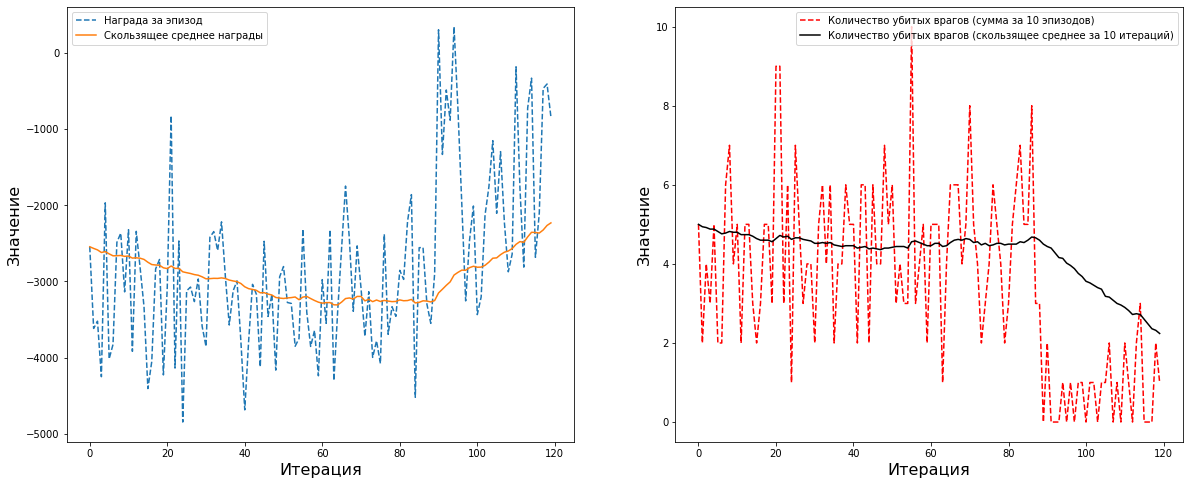

Статистика успешно сохранена.
Закончился 1200-й эпизод. Значение эпсилон: 0.01, Количество убитых врагов: 0.0, количество оставшихся патронов: 52.0
1/1 [==============================] - 0s 158ms/step


KeyboardInterrupt: ignored

In [29]:
game.new_episode()                       #Начинаем новый эпизод игры
game_data = game.get_state()             #Извлекаем информацию о текущем состоянии игры
current_info = game_data.game_variables  #current_info — массив, который содержит количество убитых врагов, наличие патронов и здоровье на текущий момент
previous_info = current_info             #previous_info — массив, который содержит количество убитых врагов, наличие патронов и здоровье на предыдущий момент

frame = game_data.screen_buffer                                                       #Извлекаем кадр из игры (480 x 640)
processed_frame = preprocess_frame(frame)                                             #Предобрабатываем кадр в черно-белый (размер 64 х 64)
current_state = np.stack([processed_frame.reshape(64, 64)] * num_frames, axis = 2)    #В качестве первого состояния просто дублируем кадр 8 раз   
previous_state = current_state  #Инициализируем предыдущий шаг как текущий шаг

interval_reward = 0  #Инициализируем награду за интервал (10 эпизодов) как 0
interval_kills = 0   #Инициализируем количество убитых врагов (10 эпизодов) как 0

while episode_number < 15001:
  timestep += 1
  action_index, epsilon = get_action(previous_state, epsilon, action_size)  #Извлекаем индекс награды и новое значение эпсилон
  action_onehot = to_categorical(action_index)                              #Приводим награду в onehot-массив
  game.set_action(action_onehot.tolist())                                   #Подаем действие в игровую среду в качестве списка 
  game.advance_action(frames_per_action)                                    #Игра продвигается на 4 кадра (значение frames_per_action)

  game_data = game.get_state()                                    #Предобрабатываем кадр в черно-белый (размер 64 х 64 x 1)

  episode_done = game.is_episode_finished() #Проверяем, если эпизод закончился

  if episode_done: #Нам необходимо возобновить среду и записать нужные статистики, когда заканчивается эпизод
    episode_number += 1   #Увеличиваем номер эпизода на 1
    interval_kills += current_info[0] #Считаем количество убитых врагов за эпизод

    #Чтобы не собирать слишком много данных и чтобы данные было удобно отображать на графике, мы записываем результаты лишь раз в 10 эпизодов
    if episode_number % 10 == 0 and episode_number > 0: #Записываем результат раз в 10 эпизодов
      record_rewards.append(interval_reward)            #Добавляем награду в список всех наград
      record_kills.append(interval_kills)  #Добавляем количество убитых врагов
      show_scores(record_rewards, record_kills)  #Записываем результаты в графики
      main_model.save_weights('/content/drive/My Drive/dueling_qn_main2.h5') #Сохраняем веса основной модели
      target_model.save_weights('/content/drive/My Drive/dueling_qn_target2.h5') #Сохраняем веса целевой модели
      with open('/content/drive/My Drive/dueling_DQN_stats2.txt', 'wb') as f:  #Записываем статистику в файл через библиотеку pickle
        pickle.dump([record_rewards, record_kills, episode_number, timestep, epsilon, memory_buffer.PER_B], f) 
      
      print("Статистика успешно сохранена.")

      print(f"Закончился {episode_number}-й эпизод. Значение эпсилон: {round(epsilon, 2)}, Количество убитых врагов: {current_info[0]}, количество оставшихся патронов: {current_info[1]}")

      interval_reward, interval_kills = 0, 0  #Заново инициализируем значения статистики для интервала в 10 эпизодов

    game.new_episode()                       #Затем необходимо начать новый эпизод игры
    game_data = game.get_state()            #Извлекаем новое состояние игры

  current_info = game_data.game_variables  #Извлекаем информацию об игровой среде (количество убитых врагов, неиспользованных патронов, текущее здоровье)
  frame = game_data.screen_buffer          #Извлекаем новый кадр из игры
  processed_frame = preprocess_frame(frame) #Предобрабатываем кадр (новая размерность будет 64 х 64 х 1)   
  current_state = np.append(processed_frame, current_state[:, :, :num_frames-1], axis = 2) #Обновляем состояние — удаляем последний кадр и добавляем новый

  environment_reward = game.get_last_reward()                            #Извлекаем награду за шаг из игровой среды
  custom_reward = get_reward(previous_info, current_info, episode_done)  #Извлекаем нагаду за шаг, используя самописную логику
  reward = environment_reward + custom_reward  #Награда за действие будет суммой награды из игровой среды и самописной награды

  interval_reward += reward #Добавляем награду в переменную для статистики
  reward = reward/50        #Нормируем награду делением на 50

  memory_buffer.store((previous_state, action_index, reward, current_state, episode_done)) #Добавляем предыдущее состояние, действие, награду и текущее состояние в память
  
  if memory_buffer.buffer_size >= observation_steps: #Если у нас достаточно данных в буфере памяти для обучения алгоритма:
    train()   #Обучаем модели по очереди, используя самописный метод

  previous_info = current_info    #Запоминаем предыдущую информацию
  previous_state = current_state  #Запоминаем предыдущее состояние

In [ ]:
video_frames = []  #Кадры из игр будут записываться в этот массив
epsilon = 0   #Устанавливаем эпсилон как 0 (после обучения)

game = DoomGame() #Снова инициализируем среду
game.load_config("/content/ViZDoom/scenarios/deadly_corridor.cfg") #Загружаем сценарий «Смертельный коридор»
game.set_screen_resolution(ScreenResolution.RES_640X480) #Устанавливаем размер кадров среды (будет 640 х 480)
game.set_window_visible(False) #Нужно отключить окно, чтобы не было ошибки
game.init() #Снова инициализируем игру

main_model = dueling_DQN(state_shape, action_size, learning_rate)   #Создаем основную модель (будет управлять агентом)
main_model.load_weights('/content/drive/My Drive/dueling_qn_main2.h5')

game.new_episode()                        #Генерируем новый эпизод
game_data = game.get_state()             #Извлекаем первый кадр (это еще не полноценное состояние)

frame = game_data.screen_buffer                                                      #Извлекаем кадр из игры (480 x 640)
processed_frame = preprocess_frame(frame)                                             #Предобрабатываем кадр в черно-белый (размер 64 х 64)
current_state = np.stack([processed_frame.reshape(64, 64)] * num_frames, axis = 2)    #В качестве первого состояния просто дублируем кадр 4 раза
previous_state = current_state    #Записываем текущее состояние в предыдущее состояние

while True:
  action_index, epsilon = get_action(current_state, epsilon, action_size)   #Извлекаем индекс награды и новое значение эпсилон
  action_onehot = to_categorical(action_index)                              #Приводим награду в onehot-массив
  game.set_action(action_onehot.tolist())                                   #Подаем действие в игровую среду в качестве списка 
  game.advance_action(frames_per_action)                                    #Игра продвигается на 4 кадра (значение frames_per_action)

  game_data = game.get_state()                                    #Предобрабатываем кадр в черно-белый (размер 64 х 64 x 1)

  episode_done = game.is_episode_finished() #Проверяем, если эпизод закончился

  if episode_done: #Нам необходимо возобновить среду и записать нужные статистики, когда заканчивается эпизод
    game.new_episode()                       #Затем необходимо начать новый эпизод игры
    game_data = game.get_state()            #Извлекаем новое состояние игры
    break #Выходим из игрового цикла

  frame = game_data.screen_buffer          #Извлекаем новый кадр из игры
  video_frames.append(np.rollaxis(frame, 0, 3)) #Добавляем кадр в массив, меняем формат размерности (3, width, height) -> (width, height, 3)

  processed_frame = preprocess_frame(frame) #Предобрабатываем кадр (новая размерность будет 64 х 64 х 1)   
  current_state = np.append(processed_frame, current_state[:, :, :num_frames-1], axis = 2) #Обновляем состояние — удаляем последний кадр и добавляем новый

  previous_state = current_state  #Запоминаем предыдущее состояние

In [ ]:
 #Создаем объект для воспроизведения видео (задаем путь к файлу видео, формат видео, кадры в секунду, и размер изображений)
out = cv2.VideoWriter('/content/episode.avi', cv2.VideoWriter_fourcc(*'DIVX'), 20, (640, 480)) #Чем больше кадров в секунду, тем быстее видео будет проигрываться
for i in range(len(video_frames)):   #В цикле добавляем каждый кадр в видео (делаем предобработку кадра - меняем каналы с RGB в BGR - это нужно потому что cv2 воспринимает каналы как BGR)
  out.write(cv2.cvtColor(video_frames[i], cv2.COLOR_RGB2BGR))
out.release()   #Закрываем объект для создания видео

In [ ]:
path="/content/episode.avi" #Указываем путь к видео

clip=VideoFileClip(path)    #Извлекаем видео из заданного пути (куда мы ранее записали видео через cv2)
clip.ipython_display(width=640, maxduration = 40) #Отображаем видео в Colab